In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
sales_data = pd.read_excel('ECOMM DATA.xlsx')

In [3]:
print(sales_data.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [7]:
print(sales_data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [4]:
# Checking for null values
print(sales_data.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [6]:
# Filling of null values
sales_data['Postal Code'].fillna(0, inplace=True)
print(sales_data.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [8]:
# Calculating total sales
total_sales = sales_data['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 12642501.909880001


In [9]:
# Convert 'Order Date' to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [12]:
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month

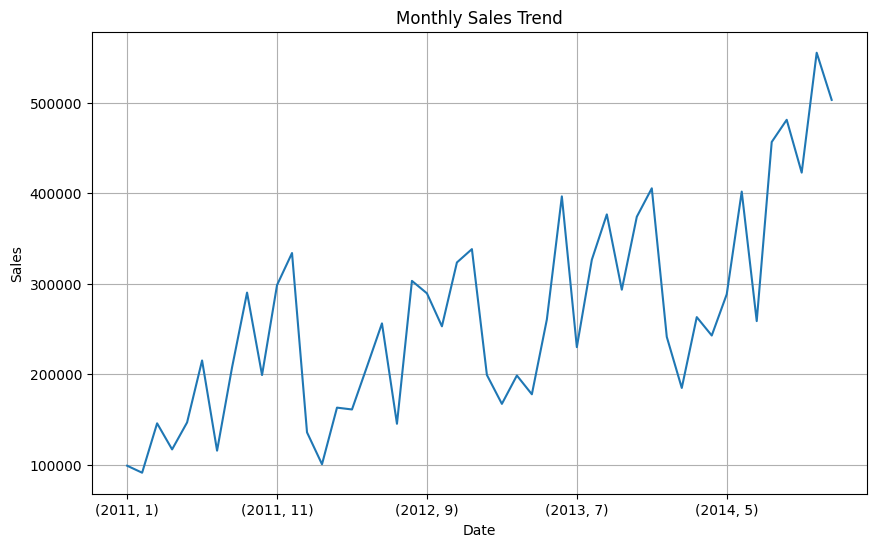

In [13]:
# Analyze sales trends over time
monthly_sales = sales_data.groupby(['Year', 'Month'])['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [14]:
# Determine best-selling products
best_selling_products = sales_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print("Best Selling Products:")
print(best_selling_products.head())

Best Selling Products:
Product Name
Apple Smart Phone, Full Size             86935.7786
Cisco Smart Phone, Full Size             76441.5306
Motorola Smart Phone, Full Size          73156.3030
Nokia Smart Phone, Full Size             71904.5555
Canon imageCLASS 2200 Advanced Copier    61599.8240
Name: Sales, dtype: float64


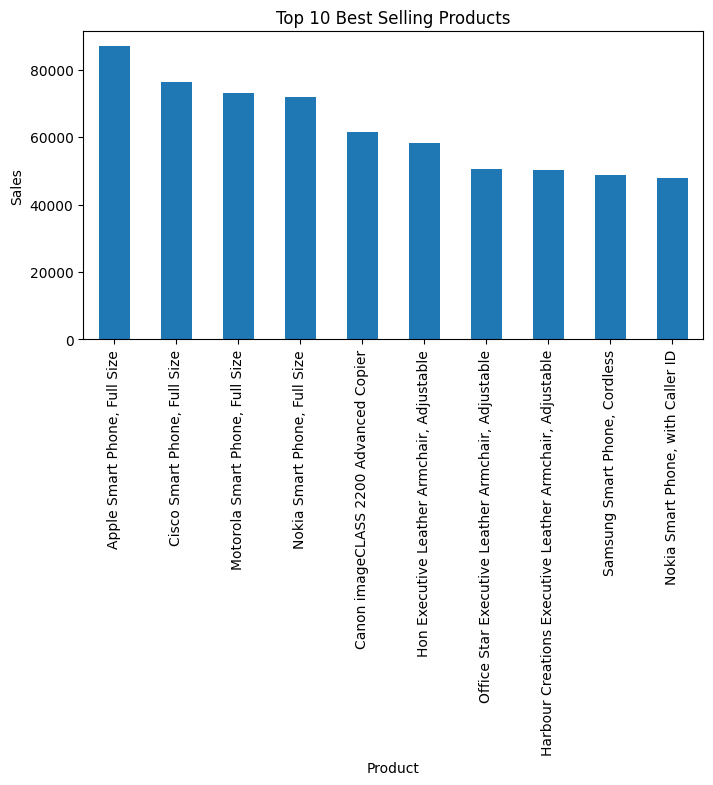

In [26]:
# Visualize best-selling products
best_selling_products.head(10).plot(kind='bar', figsize=(8, 4))
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()